# 3 Завдання

## 3.1 Виконати завдання iз прикладу i отримати файл iз навченою моделлю для розпiзнавання рукописних цифр. В будь якому графiчному редакторi створити файл iз рукописною цифрою i розпiзнати її. Пояснити результат.

### Імпортуємо значення набору даних MNIST з пакету keras. Вхідні дані мають розмір у 60 000 екземплярів та розширення у 28 * 28 пікселів.

In [8]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

*Завантаження датасету MNIST*

### Переглянемо перші 25 зображень та відповідні їм індекси за допомогою модуля matplotlib.pyplot.

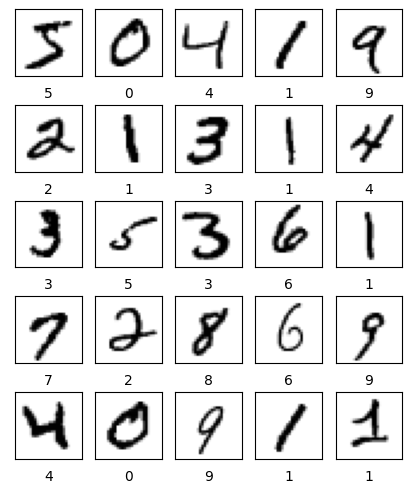

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

*Перші 25 зображень цифр*

### Робимо перетворення тривимірного масиву в двовимірний масив типу float 32. Далі нормалізовуємо його, щоб отримати значення в інтервалі від [0, 1]. Оскільки маємо лише один колір, тобто білий, то зрозуміло, що його можна закодувати у вигляді байта, пригадуючи RGB, де є 255 * 255 * 255 кольорів для червоного, зеленого, блакитного кольорів. Тому треба розділити датасет на навчальний та тестові набори і розділити кожний з елементів на 255 - найбільш яскравий білий колір.

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

*Розбиття на навчальні та тестові дані і їхня нормалізація*

### У результаті маємо, що кожне зображення - це вектор з 784 елементів від 0 до 1.

### Тепер підготуємо мітки, а саме будемо завантажувати масиви із відгуками на кожне тестове зображення. Після цього передамо нейронній мережі навчальні дані train_images та train_labesls. Так мережа навчиться зіставлятии зображення з мітками. to_categorical - функція, що дозволяє перетоврити масив NumPy, що містить числа різних категорій, у матрицю, яка має двійкові значення та має стовпці, що дорівнюють кількості категорій у даних.

In [11]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

*Підготування міток*

### Обиремо архітектуру моделі у вигляді Sequential, оскільки вона є простою послідовністю шарів - вихідного шару, який складається із 28 * 28 = 784 нейронів, тобто кожному пікселю зображення відповідає один нейрон. За допомогою методу add створимо прихований шар, який є функцією, на вхід якої подається тензор і на виході отримується тензор, можливо, іншого розміру. Використаємо щільні шари, де кожен нейрон одного шару зв'язаний з нейроном іншого. Прихований шар має 512 нейронів, вихідний - 10. Функціями активації є relu та softmax.

In [12]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

*Побудова архітектури моделі*

### Скомпілюжмо мережу, привівши її до сумісного вигляду із TensorFlow. Налаштуємо три параметри.

### По-перше, оптимізатор - це конкретний алгоритм, що буде оновлювати ваги в процесі навчання.

### По-друге, функція втрат - функція, яку оптимізатор використовує для оцінювання якості та коригування навчання.

### По-третє, метрики - об'єкти, що оцінюють результати навчання за такими параметрами як точність, коректність, повнота.

### Після визначення цих параметрів процес компіляції виконується методом .compile(). Оскільки ми вирішуємо задачу класифікації із багатьма класами, то використаємо такі параметри.

In [13]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

*Компіляція моделі*

### Навчання моделі. Викличемо метод fit для навчання, де процес адаптації відбувається у подання пакетів фіксованого розміру до моделі, яка ітеративно підганяє вагові коефіцієнти відповідно до виставлених міток з файлу міток. Кожна ітерація є епохою. За кожної епохи виправляється порушення відгуків новими змінними вагових коефіцієнтів.

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2023-03-23 21:33:18.930756: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 6ms/step - loss: 0.2647 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1073 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0701 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0384 - accuracy: 0.9883


*Навчання моделі*

### Перевіремо модель на контрольному наборі даних.

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0625 - accuracy: 0.9817


*Перевірка моделі*